In [1]:
import pandas as pd
import seaborn as sns
import BabsonAnalytics
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../data/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df = df[['Family','Income','Personal Loan']]

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier(min_samples_split=250,min_samples_leaf=250,max_leaf_nodes=5)
model.fit(df.drop('Personal Loan',axis=1),df['Personal Loan'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_split=1e-07,
            min_samples_leaf=250, min_samples_split=250,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

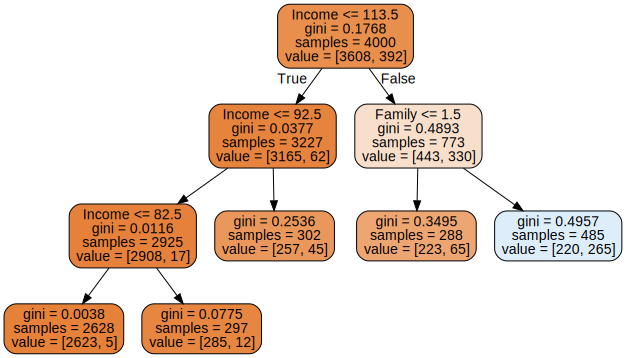

In [17]:
BabsonAnalytics.plotTree(model,train,trainTarget)

In [18]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file="mytree.dot",feature_names=df.drop('Personal Loan',axis=1).columns,filled=True,rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

import os
os.system('dot -Tpdf mytree.dot -o ../figures/tree_universal_bank.pdf')


0

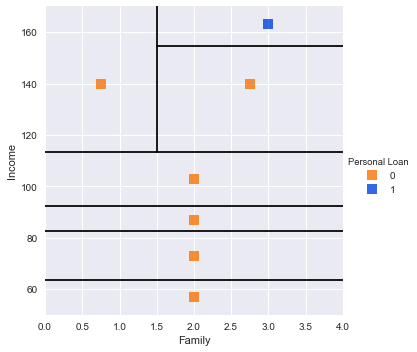

In [6]:
import matplotlib.pyplot as plt

col_list = ["orange", "blue"]
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
tmp = pd.DataFrame({'Income':[57,73,87,103,140,140,163],'Family':[2,2,2,2,.75,2.75,3],'Personal Loan':[0,0,0,0,0,0,1]})
sns.lmplot(x='Family',y='Income',hue='Personal Loan',data=tmp,fit_reg=False, markers = ['s','s'], scatter_kws={"s": 100})

plt.plot([0,4],[113.5, 113.5],'k')
plt.plot([1.5, 1.5],[113.5, 170],'k')
plt.plot([1.5, 4],[154.5,154.5],'k')
plt.plot([0,4],[92.5, 92.5],'k')
plt.plot([0,4],[82.5,82.5],'k')
plt.plot([0,4],[63.5, 63.5],'k')

plt.xlim((0,4))
plt.ylim((50,170))

plt.savefig('../figures/tree_universal_bank_tree_map.pdf')



In [7]:
import BabsonAnalytics
model = tree.DecisionTreeClassifier(max_leaf_nodes = 2)
model.fit(df.drop('Personal Loan',axis=1),df['Personal Loan'])

export_graphviz(model, out_file="mytree.dot",feature_names=df.drop('Personal Loan',axis=1).columns,filled=True,rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

import os
os.system('dot -Tpdf mytree.dot -o ../figures/tree_underfit.pdf')

0

In [8]:
model = tree.DecisionTreeClassifier(max_leaf_nodes = 20)
model.fit(df.drop('Personal Loan',axis=1),df['Personal Loan'])

export_graphviz(model, out_file="mytree.dot",feature_names=df.drop('Personal Loan',axis=1).columns,filled=True,rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

import os
os.system('dot -Tpdf mytree.dot -o ../figures/tree_overfit.pdf')

0

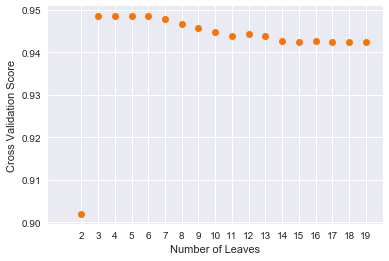

In [14]:
train = df.sample(frac=0.8)
test = df.drop(train.index)

trainTarget = train.pop('Personal Loan')
testTarget = test.pop('Personal Loan')

import BabsonAnalytics
model = tree.DecisionTreeClassifier()
BabsonAnalytics.crossValTree(model,train,trainTarget)

import matplotlib.pyplot as plt
plt.savefig('../figures/tree_cross_val.pdf')